In [234]:
import pandas as pd
data = pd.read_csv('credit_new.csv')

In [235]:
data.head()

,Unnamed: 0,SEX,EDUCATION,MARRIAGE,Trend_SEP,Trend_AUG,Trend_JUL,Trend_JUN,Trend_MAY,Trend_APR,...,BILL_AMT6,BILL_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,DEFAULT,CREDIT_Range,AGE_Range
0,0,2,2,1,2,2,-1,-1,-2,-2,...,0,0,689,0,0,0,0,1,0,1
1,1,2,2,2,-1,2,0,0,0,2,...,3261,0,1000,1000,1000,0,2000,1,1,1
2,2,2,2,2,0,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,1
3,3,2,2,1,0,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,2
4,4,1,2,1,-1,0,-1,0,0,0,...,19131,2000,36681,10000,9000,689,679,0,0,3


In [236]:
data = data.rename(columns = {"BILL_AMT1": "BILL_SEP"})
data = data.rename(columns = {"BILL_AMT2": "BILL_AUG"})
data = data.rename(columns = {"BILL_AMT3": "BILL_JUL"})
data = data.rename(columns = {"BILL_AMT4": "BILL_JUN"})
data = data.rename(columns = {"BILL_AMT5": "BILL_MAY"})
data = data.rename(columns = {"BILL_AMT6": "BILL_APR"})

In [237]:
data.drop(["Unnamed: 0"], axis=1, inplace= True)

In [238]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [239]:
X = data.drop(columns =["DEFAULT"])
X

,SEX,EDUCATION,MARRIAGE,Trend_SEP,Trend_AUG,Trend_JUL,Trend_JUN,Trend_MAY,Trend_APR,BILL_SEP,...,BILL_MAY,BILL_APR,BILL_SEP,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,CREDIT_Range,AGE_Range
0,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,689,0,0,0,0,0,1
1,2,2,2,-1,2,0,0,0,2,2682,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,2,2,2,0,0,0,0,0,0,29239,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1
3,2,2,1,0,0,0,0,0,0,46990,...,28959,29547,2000,2019,1200,1100,1069,1000,0,2
4,1,2,1,-1,0,-1,0,0,0,8617,...,19146,19131,2000,36681,10000,9000,689,679,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,3,1,0,0,0,0,0,0,188948,...,31237,15980,8500,20000,5003,3047,5000,1000,2,2
29996,1,3,2,-1,-1,-1,-1,0,0,1683,...,5190,0,1837,3526,8998,129,0,0,1,2
29997,1,2,2,4,3,2,-1,0,0,3565,...,20582,19357,0,0,22000,4200,2000,3100,0,2
29998,1,3,1,1,-1,0,0,0,-1,-1645,...,11855,48944,85900,3409,1178,1926,52964,1804,0,2


In [240]:
# Y DATA
Y = data["DEFAULT"]
Y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: DEFAULT, Length: 30000, dtype: int64

In [241]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25, random_state=0)

In [242]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest

In [254]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 10, random_state = 0 )
clf.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=10, random_state=0)

In [255]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [256]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.8106666666666666


In [257]:
print(clf.feature_importances_)

[0.01443501 0.02117837 0.01674529 0.08601798 0.04034562 0.0474293
 0.0170442  0.03110983 0.01977872 0.06770179 0.0590696  0.06070825
 0.05882444 0.0557242  0.05557902 0.05845993 0.04981696 0.04885774
 0.04559424 0.05062855 0.05082031 0.02476604 0.0193646 ]


In [258]:
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

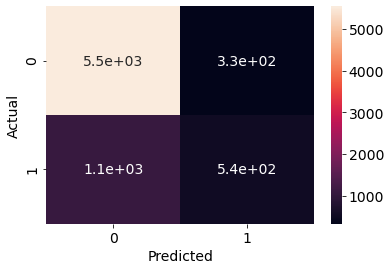

In [259]:
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True)

In [260]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error: 0.18933333333333333
Mean Squared Error: 0.18933333333333333
Root Mean Squared Error: 0.43512450325548585


In [261]:
print(metrics.classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      6634
           1       0.33      0.62      0.43       866

    accuracy                           0.81      7500
   macro avg       0.64      0.73      0.66      7500
weighted avg       0.87      0.81      0.83      7500



from sklearn.metrics import confusion_matrix
mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [262]:
feature_list =list(X.columns)
feature_imp= pd.Series(clf.feature_importances_,index= feature_list
                      ).sort_values(ascending = False)
print(feature_imp)

Trend_SEP       0.086018
BILL_SEP        0.067702
BILL_JUL        0.060708
BILL_AUG        0.059070
BILL_JUN        0.058824
BILL_SEP        0.058460
BILL_MAY        0.055724
BILL_APR        0.055579
PAY_APR         0.050820
PAY_MAY         0.050629
PAY_AUG         0.049817
PAY_JUL         0.048858
Trend_JUL       0.047429
PAY_JUN         0.045594
Trend_AUG       0.040346
Trend_MAY       0.031110
CREDIT_Range    0.024766
EDUCATION       0.021178
Trend_APR       0.019779
AGE_Range       0.019365
Trend_JUN       0.017044
MARRIAGE        0.016745
SEX             0.014435
dtype: float64


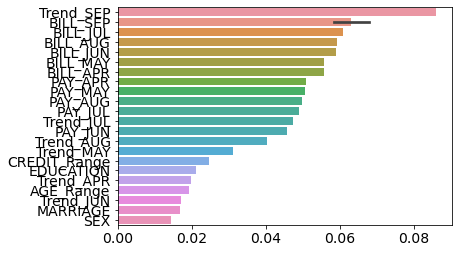

In [263]:
#Creation a bar plot
sns.barplot(x = feature_imp, y= feature_imp.index)

# Generating the Model on Selected Features

In [264]:
data.drop(["SEX"], axis=1, inplace= True)
data.drop(["MARRIAGE"], axis=1, inplace= True)
data.drop(["AGE_Range"], axis=1, inplace= True)
data.drop(["Trend_JUN"], axis=1, inplace= True)
data.drop(["Trend_APR"], axis=1, inplace= True)
data.drop(["EDUCATION"], axis=1, inplace= True)
data.drop(["CREDIT_Range"], axis=1, inplace= True)
data.drop(["Trend_MAY"], axis=1, inplace= True)
data.drop(["Trend_AUG"], axis=1, inplace= True)
data.drop(["PAY_JUN"], axis=1, inplace= True)
data.drop(["Trend_JUL"], axis=1, inplace= True)
data.drop(["PAY_JUL"], axis=1, inplace= True)
data.drop(["PAY_AUG"], axis=1, inplace= True)

In [265]:
X = data.drop(columns =["DEFAULT"])
Y = data["DEFAULT"]

In [266]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.25, random_state=0)

In [267]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_pred2=clf.predict(X_test)

In [268]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.8106666666666666


In [269]:
feature_list =list(X.columns)
feature_imp= pd.Series(clf.feature_importances_,index= feature_list
                      ).sort_values(ascending = False)
print(feature_imp)

Trend_SEP    0.166320
BILL_SEP     0.108984
BILL_AUG     0.100750
BILL_JUL     0.096043
BILL_SEP     0.094382
BILL_JUN     0.092808
BILL_APR     0.091587
BILL_MAY     0.091049
PAY_APR      0.082106
PAY_MAY      0.075970
dtype: float64


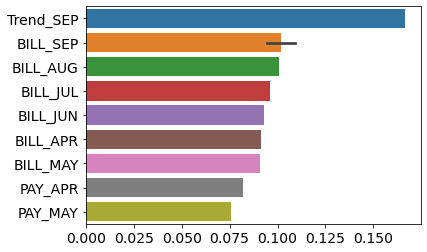

In [270]:
sns.barplot(x = feature_imp, y= feature_imp.index)